# Chapter 4.1: Classifying Movie Reviews: A Binary Classification

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt

# import TF
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers

# 4.1.1. The IMBD Dataset
- About: a set of 50k highly polarized reviews from Internet Movie Database. They are split into 25k reviews for training and 25k reviews for testing, each set consisting of 50% negative and 50% positive reviews.
- The dataset has been processed and embedded into keras.

In [2]:
# load the dataset, 10k is the number of uniques words in the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


**Note**: variables in train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). The Labels are 0s and 1s with 0s is negative review and 1 is positive review.

In [3]:
print(train_data[0])
print(test_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
0


**Note**: The training data has been encode into numerical values. However, we can convert it back to English words.

In [4]:
# sample of reverse encoding data to English

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# reversed it, mapping integer indices to words
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])

# decodes the review. Note that the indices are offset by 3 because 0, 1, 2 are reversed indiced for "padding", "start of sequence", and "unknown"
decoded_review = " ".join([reversed_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

1654784/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

# 4.1.2. Preparing the data
- You can't feed the list of integer into NN, we need to make them uniform.
    - Pad the list so that they have the same shape (samples, max_length).
    - Multi-hot encode your lists to turn them into vectors of 0s and 1s.

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    # create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    
    # go thru each sequence, then go thru each encoded words, the make it 1
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [6]:
# vectorize training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
print(train_data[0])
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[0. 1. 1. ... 0. 0. 0.]


In [8]:
# vectorize labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
print(y_train)
print(y_test)

[1. 0. 0. ... 0. 1. 0.]
[0. 1. 1. ... 0. 0. 0.]


# 4.1.3. Build Model
- As the data and labels are vectors of 1s and 0s, we just need Dense Layer.
- Questions:
    - How many layers to use?
    - How many units to choose for each layer?
    - Learn later in Chapter 5.
    - Architecture Dense(units = 16) -> Dense(units = 16) -> Dense(units = 1)
    - Note at each layer: output = relu(dot(input, W) + b)

In [10]:
# create model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),  # (input_dimension, 16)
    layers.Dense(16, activation="relu"),  # (16, 16), relu will zero out negative values
    layers.Dense(1, activation="sigmoid") # (16, 1), sigmoid so that output is probability, sigmoise squashes arbitray value into [0,1] which is the probability output
])

2023-02-03 06:44:33.811049: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


**Note on Model Architecture**: if you build the model too large, it may learn unwanted patterns

**Note on Loss Function**: As you are doing binary classification and the output is a probability, the best loss is *binary_crossentropy* loss or *mse*. *cross-entropy* is better to use when the model is outputing probability.

**Note on Optimizer**: RMSProp as default good for any problem

In [11]:
# compile model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 4.1.4. Train & Validate Model
- Instead of training the model in the entire dataset, we use validation dataset to see the performance.

In [12]:
# validate dataset of 10k rows
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
# check shape
print(x_val.shape)
print(partial_x_train.shape)
print(y_val.shape)
print(partial_y_train.shape)

(10000, 10000)
(15000, 10000)
(10000,)
(15000,)


**Note**: 
- Train the model for 20 epochs (20 iterations over all samples) in mini batch of 512 samples.
- Monitor loss and accuracy on validation dataset.

In [14]:
# train model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=12,
                    validation_data=(x_val, y_val))

2023-02-03 06:44:35.352525: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1250/1250 [==============================] - 9s 6ms/step - loss: 0.3427 - accuracy: 0.8587 - val_loss: 0.2745 - val_accuracy: 0.8902
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2171 - accuracy: 0.9198 - val_loss: 0.2790 - val_accuracy: 0.8916
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1793 - accuracy: 0.9341 - val_loss: 0.2948 - val_accuracy: 0.8895
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1559 - accuracy: 0.9442 - val_loss: 0.2993 - val_accuracy: 0.8867
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1379 - accuracy: 0.9515 - val_loss: 0.3326 - val_accuracy: 0.8859
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.1229 - accuracy: 0.9583 - val_loss: 0.3542 - val_accuracy: 0.8867
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1095 - accuracy: 0.9636 - val_loss: 0.3711 - val_accuracy:

In [15]:
# plot the history 
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

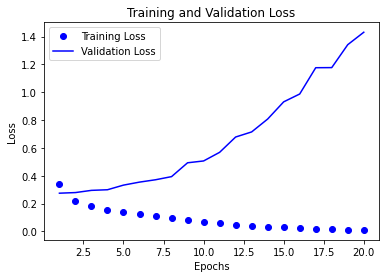

In [16]:
# plot the training and validation loss from history
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

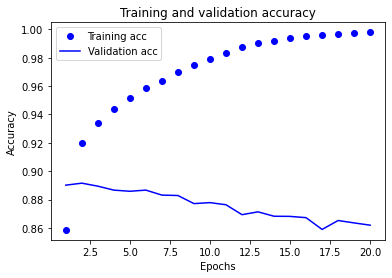

In [17]:
# plot the training and validation accuracy from history
plt.clf() # clear figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 4.1.5. Analysis
- From the two plots, we see that the model is overfit, aka we over optimize on the training dataset and the model is not generalized.

# 4.1.6. Retrain Model

In [18]:
# create model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),  # (input_dimension, 16)
    layers.Dense(16, activation="relu"),  # (16, 16), relu will zero out negative values
    layers.Dense(1, activation="sigmoid") # (16, 1), sigmoid so that output is probability, sigmoise squashes arbitray value into [0,1] which is the probability output
])

In [19]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4747 - accuracy: 0.8087
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2742 - accuracy: 0.9073
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2074 - accuracy: 0.9303
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2963 - accuracy: 0.8812


In [20]:
# print out test loss and test accuracy
print(results)

[0.2962503433227539, 0.8811600208282471]


In [21]:
# predict on test dataset
model.predict(x_test)

array([[0.24786013],
       [0.99767786],
       [0.909508  ],
       ...,
       [0.14659196],
       [0.10956538],
       [0.6202767 ]], dtype=float32)